In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st

In [9]:
df=pd.read_csv('temp_datalab_records_linkedin_company.csv',parse_dates=['as_of_date']
              )

### Exploratory Data Analysis

In [10]:
df.head()

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2426196 entries, 0 to 2426195
Data columns (total 14 columns):
dataset_id               int64
as_of_date               datetime64[ns]
company_name             object
followers_count          int64
employees_on_platform    int64
link                     object
industry                 object
date_added               object
date_updated             object
description              object
website                  object
entity_id                float64
cusip                    float64
isin                     float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 259.1+ MB


Variables

In [10]:
df.as_of_date.describe()

count                 2426196
unique                   1033
top       2018-02-17 00:00:00
freq                     4430
first     2015-09-14 00:00:00
last      2018-07-17 00:00:00
Name: as_of_date, dtype: object

In [11]:
df.company_name.value_counts()

City National Bank                     1605
American Airlines                      1029
Apple                                  1025
Cisco                                  1024
Amgen                                  1024
                                       ... 
First Mid-Illinois Bank &amp; Trust       1
Skyscanner                                1
Innovative Solutions &amp; Support        1
United Bank & Capital Trust Co.           1
Malvern Federal Savings Bank              1
Name: company_name, Length: 5028, dtype: int64

In [12]:
df.industry.value_counts()

Banking                                 168364
Biotechnology                           152710
Financial Services                      148143
Oil & Energy                            116830
Retail                                   95384
                                         ...  
Photography                                 94
Program Development                         93
Individual &amp; Family Services            56
Professional Training &amp; Coaching        47
Gambling &amp; Casinos                      31
Name: industry, Length: 140, dtype: int64

In [13]:
df.followers_count.describe()

count    2.426196e+06
mean     7.167738e+04
std      2.638344e+05
min      0.000000e+00
25%      2.148000e+03
50%      9.335000e+03
75%      3.864200e+04
max      7.833967e+06
Name: followers_count, dtype: float64

In [14]:
df.employees_on_platform.describe()

count    2.426196e+06
mean     7.587255e+03
std      2.412444e+04
min      0.000000e+00
25%      2.180000e+02
50%      1.083000e+03
75%      4.513000e+03
max      5.779520e+05
Name: employees_on_platform, dtype: float64

A snapshot as of 2018 July

In [20]:
df_recent=df.loc[df.as_of_date==df.as_of_date.max(),:]

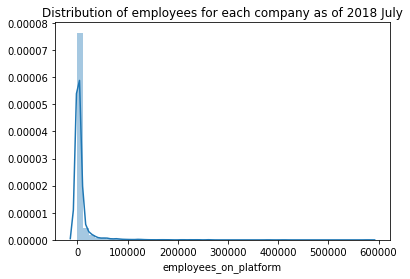

In [21]:
plt.title("Distribution of employees for each company as of 2018 July")
ax = sns.distplot(df_recent['employees_on_platform'])

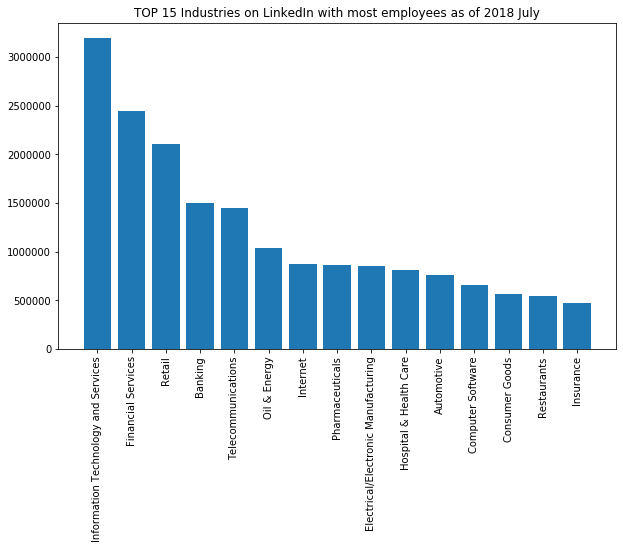

In [45]:
grouped=df_recent.groupby(['industry'])['employees_on_platform'].sum().reset_index()
group15=grouped.sort_values('employees_on_platform',ascending=False).head(15)
plt.figure(figsize=(10,6))
plt.bar(group15.industry,group15.employees_on_platform,align='center')
plt.title('TOP 15 Industries on LinkedIn with most employees as of 2018 July')
plt.xticks(rotation=90)
plt.show()

Employees overtime by industry

In [49]:
df_focused=df.loc[df.industry.isin(group15.industry.to_list()),]
grouped=df_focused.groupby(['as_of_date','industry'])['employees_on_platform'].sum().unstack()


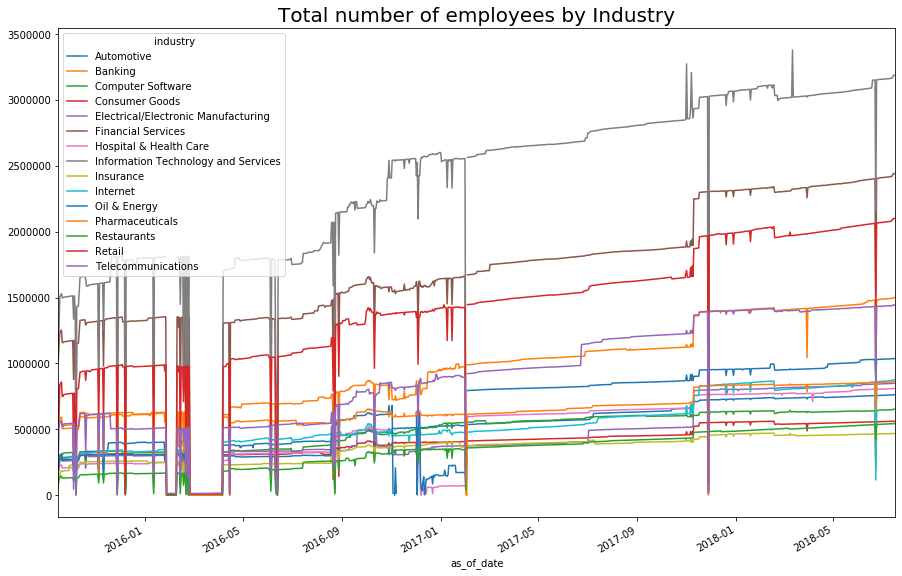

In [50]:
fig, ax = plt.subplots(figsize=(15,10))
grouped.plot(ax=ax)
ax.set_title('Total number of employees by Industry',fontsize= 20) 

plt.show()

In [43]:
grouped_count=df_focused.groupby(['as_of_date','industry'])['company_name'].count().unstack()

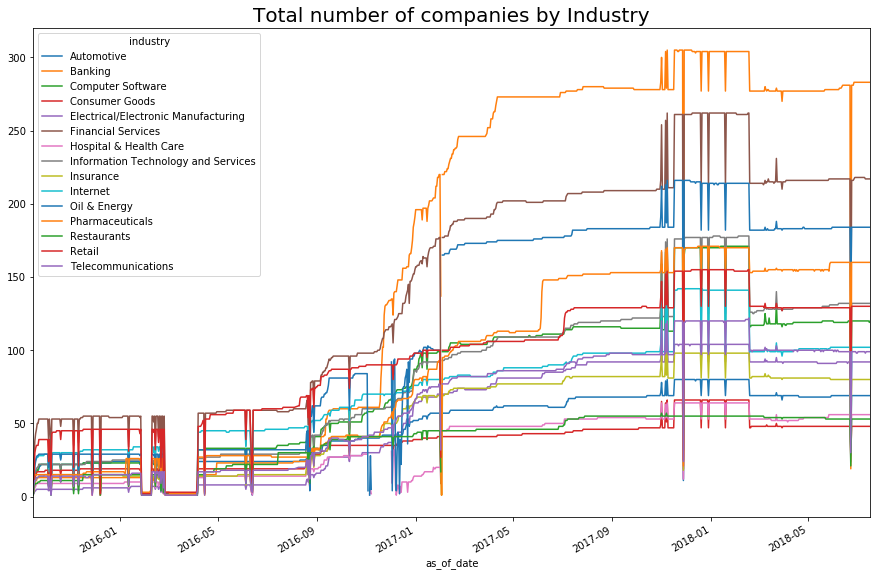

In [47]:
fig, ax = plt.subplots(figsize=(15,10))

grouped_count.plot(ax=ax)
ax.set_title('Total number of companies by Industry',fontsize= 20) 
plt.show()

In [8]:
df['year']=df['as_of_date'].dt.year
df['month']=df['as_of_date'].dt.month
df['dayofmonth']=df['as_of_date'].dt.day
df['dayofweek']=df['as_of_date'].dt.dayofweek
df['weekofyear']=df['as_of_date'].dt.weekofyear